# Eksperiment med billedsortering

Udsprunget af snak under hack4dk omkring metadata på nationalmuseets billeder, – hvor det viste sig at det ikke er opmarket overordnet  hvilken type billede det er.

*Se bunden af dette dokument, for at se hvordan billeder klassificeres.*

Min tilgang:

- nogle billeder fra samlingen sorteres i forskellige bunker efter type (ca. 50 i hver bunke), – der derefter blev navngivet, såsom dragter, objekter, ark, fotos, ...
- koden herunder træner et neuralt netværk, der genkender de forskellige typer af billeder
- det neurale netværk kan nu bruges til at klassificere/sortere tusindevis billeder fra samlingen (dog med en vis fejlrate).


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import display
import itertools

In [3]:
path = Path('categories');
path.ls()
files = [f for f in path.glob("*/*")]
files = list(itertools.chain(files))

In [4]:
np.random.seed(2)
pat = r'/([^/]+)/[^/]+.jpg$'

In [5]:
data = ImageDataBunch.from_name_re(
    path, files, pat, valid_pct=0.1,
    ds_tfms=get_transforms(), size=224, bs=64)

In [6]:
data.classes

['ark', 'dragter', 'fotos', 'objekter', 'sider', 'symboler', 'tegninger']

In [7]:
# data.show_batch(rows=5, figsize=(8,8))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_top_losses(9, figsize=(15,11))

In [17]:
imgPath = Path('img')
files = list(imgPath.glob("*/*"))
random.shuffle(files)

img/AS/17790 – objekter :


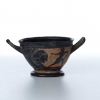

img/AS/14978 – symboler :


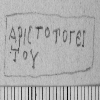

img/ES/185231 – fotos :


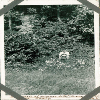

img/AS/16917 – objekter :


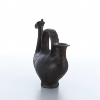

img/DO/1090 – objekter :


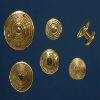

img/DMR/193822 – tegninger :


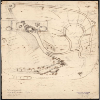

img/ES/116618 – objekter :


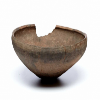

img/DMR/175733 – tegninger :


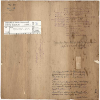

img/DMR/194410 – objekter :


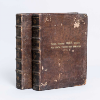

img/ES/191047 – fotos :


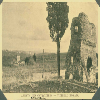

img/DNT/154544 – fotos :


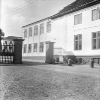

img/DNT/118423 – fotos :


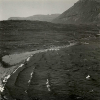

img/AS/20995 – objekter :


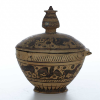

img/ES/108327 – tegninger :


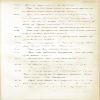

img/DNT/154346 – fotos :


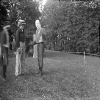

img/ES/193548 – fotos :


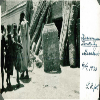

img/AS/20197 – objekter :


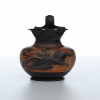

img/DMR/172309 – fotos :


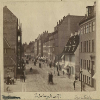

img/ES/190067 – tegninger :


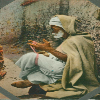

img/DNT/10050 – ark :


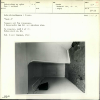

In [23]:
for file in files[:20]:
    img = open_image(file)
    pred_class,pred_idx,outputs = learn.predict(img)
    img.resize(100)
    print(file, '–', pred_class, ':')
    display(img)
    